## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [2]:
import unlimtd_i
import time
from jax import random
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils
from matplotlib import pyplot as plt
import dataset_sines_infinite
import dataset_sines_finite

In [3]:
dataset_sines_finite.init_dataset(random.PRNGKey(0), 0.05, _n_train_tasks=10)

2022-08-26 19:07:59.980168: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-26 19:07:59.980200: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


## Option #1: training the network in this notebook

In [4]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [5]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_i.unlimtd_i_uni_modal_finite(seed=seed,
                                                                                     pre_n_epochs=60000,
                                                                                     pre_n_tasks=6,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=0,
                                                                                     post_n_tasks=0,
                                                                                     post_K=0,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

This is UNLIMTD-I
For the uni-modal dataset: finite sine dataset (make sure that you have initialized dataset_sines_finite.py beforehand)
This variant of UNLIMTD-I approaches the distribution with a single GP
Creating model
Creating optimizers (pre-training)
Starting training
Starting training with:
-n_epochs=60000
-n_tasks=6
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 1236.2206 (3.1000 s)
Eval: (DeviceArray(1721.0223, dtype=float32), DeviceArray(4.955229, dtype=float32))
10  | 979.8513 (0.0031 s)
20  | 183.6270 (0.0031 s)
30  | 1554.7561 (0.0031 s)
40  | 993.6662 (0.0031 s)
50  | 755.7170 (0.0031 s)
60  | 328.1130 (0.0033 s)
70  | 172.8349 (0.0031 s)
80  | 187.6762 (0.0031 s)
90  | 37.4248 (0.0031 s)
100  | 51.5513 (0.0031 s)
110  | 97.0201 (0.0031 s)
120  | 35.5976 (0.0031 s)
130  | 118.4670 (0.0031 s)
140  | 82.2834 (0.0031 s)
150  | 90.7843 (0.0031 s)
160  | 103.7850 (0.0034 s)
170  | 38.3985 (0.0032 s)
180  | 41.9580 (0.0031 s)
190  | 24.6333 (0.0031 s)
200  | 22.0210 (0.0031 s

2760  | 4.8350 (0.0037 s)
2770  | 9.1039 (0.0040 s)
2780  | 8.4920 (0.0034 s)
2790  | 6.9621 (0.0071 s)
2800  | 20.5479 (0.0102 s)
2810  | 15.0408 (0.0078 s)
2820  | 5.9598 (0.0071 s)
2830  | 5.2148 (0.0064 s)
2840  | 7.6266 (0.0034 s)
2850  | 8.9937 (0.0033 s)
2860  | 3.9715 (0.0033 s)
2870  | 8.8460 (0.0033 s)
2880  | 8.8998 (0.0034 s)
2890  | 9.8998 (0.0041 s)
2900  | 9.0673 (0.0038 s)
2910  | 6.4501 (0.0032 s)
2920  | 10.0978 (0.0032 s)
2930  | 7.2803 (0.0041 s)
2940  | 11.2767 (0.0040 s)
2950  | 2.8353 (0.0032 s)
2960  | 8.4173 (0.0034 s)
2970  | 5.5994 (0.0034 s)
2980  | 6.9047 (0.0036 s)
2990  | 3.9789 (0.0038 s)
3000  | 3.9369 (0.0040 s)
Eval: (DeviceArray(8.512227, dtype=float32), DeviceArray(0.25021702, dtype=float32))
3010  | 5.4758 (0.0031 s)
3020  | 7.5894 (0.0031 s)
3030  | 7.7844 (0.0036 s)
3040  | 7.3622 (0.0037 s)
3050  | 5.7812 (0.0031 s)
3060  | 8.2570 (0.0033 s)
3070  | 5.6962 (0.0039 s)
3080  | 9.3576 (0.0039 s)
3090  | 7.6374 (0.0031 s)
3100  | 6.1458 (0.0036 s)
3

5740  | 3.4420 (0.0036 s)
5750  | 7.7462 (0.0035 s)
5760  | 4.7325 (0.0039 s)
5770  | 3.5198 (0.0044 s)
5780  | 6.9206 (0.0040 s)
5790  | 5.9897 (0.0035 s)
5800  | 5.1247 (0.0035 s)
5810  | 2.9580 (0.0035 s)
5820  | 6.7855 (0.0047 s)
5830  | 1.2348 (0.0036 s)
5840  | 4.8646 (0.0035 s)
5850  | 6.0915 (0.0039 s)
5860  | 7.6666 (0.0042 s)
5870  | 1.5178 (0.0036 s)
5880  | 2.4777 (0.0034 s)
5890  | 6.1283 (0.0040 s)
5900  | 6.5790 (0.0043 s)
5910  | 6.9120 (0.0034 s)
5920  | 4.8504 (0.0035 s)
5930  | 5.1024 (0.0036 s)
5940  | 4.3642 (0.0034 s)
5950  | 7.3468 (0.0035 s)
5960  | 4.4483 (0.0039 s)
5970  | 5.0305 (0.0037 s)
5980  | 5.5685 (0.0043 s)
5990  | 4.3131 (0.0045 s)
6000  | 5.7524 (0.0039 s)
Eval: (DeviceArray(6.626486, dtype=float32), DeviceArray(0.10274313, dtype=float32))
6010  | 5.0698 (0.0037 s)
6020  | 7.0952 (0.0034 s)
6030  | 6.0706 (0.0034 s)
6040  | 4.8618 (0.0041 s)
6050  | 4.5849 (0.0035 s)
6060  | 3.4736 (0.0034 s)
6070  | 4.3975 (0.0036 s)
6080  | 8.5203 (0.0046 s)
6090 

8720  | 4.9446 (0.0048 s)
8730  | 5.7993 (0.0048 s)
8740  | 4.8289 (0.0053 s)
8750  | 6.0464 (0.0045 s)
8760  | 3.5631 (0.0039 s)
8770  | 3.3958 (0.0038 s)
8780  | 2.9323 (0.0043 s)
8790  | 3.8042 (0.0037 s)
8800  | 7.4105 (0.0034 s)
8810  | 3.7482 (0.0040 s)
8820  | 4.3716 (0.0034 s)
8830  | 4.5692 (0.0035 s)
8840  | 4.1192 (0.0041 s)
8850  | 5.6443 (0.0038 s)
8860  | 4.0888 (0.0049 s)
8870  | 4.8681 (0.0041 s)
8880  | 6.8556 (0.0042 s)
8890  | 5.3949 (0.0035 s)
8900  | 5.7782 (0.0047 s)
8910  | 8.0191 (0.0044 s)
8920  | 5.6339 (0.0050 s)
8930  | 4.1680 (0.0044 s)
8940  | 7.3956 (0.0045 s)
8950  | 5.6667 (0.0046 s)
8960  | 4.2083 (0.0034 s)
8970  | 4.6166 (0.0075 s)
8980  | 4.6443 (0.0064 s)
8990  | 6.1542 (0.0079 s)
9000  | 3.3239 (0.0060 s)
Eval: (DeviceArray(6.165709, dtype=float32), DeviceArray(0.08927176, dtype=float32))
9010  | 2.7090 (0.0040 s)
9020  | 5.8287 (0.0040 s)
9030  | 6.9870 (0.0032 s)
9040  | 4.2669 (0.0037 s)
9050  | 5.3954 (0.0031 s)
9060  | 6.9181 (0.0045 s)
9070 

11620  | 2.1135 (0.0033 s)
11630  | 5.2967 (0.0033 s)
11640  | 7.1524 (0.0038 s)
11650  | 3.5284 (0.0033 s)
11660  | 5.4999 (0.0054 s)
11670  | 6.4779 (0.0059 s)
11680  | 8.4287 (0.0058 s)
11690  | 2.6507 (0.0048 s)
11700  | 3.7302 (0.0048 s)
11710  | 3.2325 (0.0048 s)
11720  | 3.7640 (0.0056 s)
11730  | 6.3806 (0.0033 s)
11740  | 4.4258 (0.0032 s)
11750  | 4.4829 (0.0032 s)
11760  | 6.3969 (0.0033 s)
11770  | 2.6438 (0.0033 s)
11780  | 5.0174 (0.0033 s)
11790  | 6.0910 (0.0034 s)
11800  | 6.0419 (0.0033 s)
11810  | 2.0323 (0.0036 s)
11820  | 4.5515 (0.0034 s)
11830  | 4.7161 (0.0034 s)
11840  | 4.7607 (0.0032 s)
11850  | 4.1011 (0.0032 s)
11860  | 5.9591 (0.0032 s)
11870  | 2.1819 (0.0032 s)
11880  | 9.2253 (0.0032 s)
11890  | 5.1635 (0.0034 s)
11900  | 4.1588 (0.0034 s)
11910  | 4.8746 (0.0032 s)
11920  | 5.9712 (0.0032 s)
11930  | 7.6136 (0.0032 s)
11940  | 4.4767 (0.0032 s)
11950  | 3.3025 (0.0032 s)
11960  | 1.8247 (0.0032 s)
11970  | 4.2423 (0.0057 s)
11980  | 4.9580 (0.0062 s)
1

14500  | 3.5595 (0.0055 s)
Eval: (DeviceArray(5.510679, dtype=float32), DeviceArray(0.11500496, dtype=float32))
14510  | 2.7175 (0.0035 s)
14520  | 5.2590 (0.0046 s)
14530  | 4.8221 (0.0034 s)
14540  | 4.1340 (0.0034 s)
14550  | 7.6161 (0.0040 s)
14560  | 5.4681 (0.0040 s)
14570  | 6.7677 (0.0044 s)
14580  | 8.1769 (0.0034 s)
14590  | 3.0968 (0.0038 s)
14600  | 3.6360 (0.0034 s)
14610  | 4.4379 (0.0035 s)
14620  | 4.7468 (0.0041 s)
14630  | 2.6767 (0.0040 s)
14640  | 7.4888 (0.0041 s)
14650  | 5.9762 (0.0034 s)
14660  | 3.9313 (0.0037 s)
14670  | 3.4676 (0.0041 s)
14680  | 4.3906 (0.0042 s)
14690  | 4.4874 (0.0043 s)
14700  | 4.4225 (0.0112 s)
14710  | 7.3515 (0.0097 s)
14720  | 3.7748 (0.0067 s)
14730  | 2.9654 (0.0073 s)
14740  | 5.4308 (0.0036 s)
14750  | 4.2129 (0.0040 s)
14760  | 2.7890 (0.0046 s)
14770  | 4.4878 (0.0042 s)
14780  | 3.0263 (0.0037 s)
14790  | 3.8355 (0.0048 s)
14800  | 4.1881 (0.0037 s)
14810  | 2.5671 (0.0042 s)
14820  | 3.6576 (0.0043 s)
14830  | 4.1535 (0.0044 

17400  | 3.9712 (0.0033 s)
17410  | 2.8517 (0.0035 s)
17420  | 2.7076 (0.0034 s)
17430  | 2.6182 (0.0039 s)
17440  | 5.8660 (0.0034 s)
17450  | 5.0888 (0.0040 s)
17460  | 4.9380 (0.0039 s)
17470  | 4.2878 (0.0040 s)
17480  | 4.9951 (0.0033 s)
17490  | 5.9031 (0.0034 s)
17500  | 2.5610 (0.0034 s)
Eval: (DeviceArray(5.7403545, dtype=float32), DeviceArray(0.13708532, dtype=float32))
17510  | 3.1631 (0.0052 s)
17520  | 5.0636 (0.0051 s)
17530  | 5.5618 (0.0064 s)
17540  | 5.3032 (0.0039 s)
17550  | 6.5987 (0.0036 s)
17560  | 2.5223 (0.0042 s)
17570  | 4.8689 (0.0033 s)
17580  | 5.2357 (0.0038 s)
17590  | 3.7380 (0.0041 s)
17600  | 3.9929 (0.0037 s)
17610  | 6.0054 (0.0039 s)
17620  | 4.0982 (0.0039 s)
17630  | 6.6938 (0.0041 s)
17640  | 1.2312 (0.0035 s)
17650  | 6.4652 (0.0042 s)
17660  | 3.8282 (0.0040 s)
17670  | 5.8232 (0.0042 s)
17680  | 3.6421 (0.0038 s)
17690  | 5.3484 (0.0046 s)
17700  | 4.5884 (0.0039 s)
17710  | 3.8853 (0.0037 s)
17720  | 2.1711 (0.0044 s)
17730  | 2.2259 (0.0044

20300  | 3.4446 (0.0034 s)
20310  | 5.3607 (0.0034 s)
20320  | 5.8890 (0.0038 s)
20330  | 4.6343 (0.0034 s)
20340  | -0.0493 (0.0032 s)
20350  | 4.5701 (0.0032 s)
20360  | 3.7568 (0.0032 s)
20370  | 3.7475 (0.0033 s)
20380  | 5.8662 (0.0040 s)
20390  | 3.2981 (0.0032 s)
20400  | 2.8713 (0.0033 s)
20410  | 4.0424 (0.0037 s)
20420  | 4.1444 (0.0032 s)
20430  | 4.3037 (0.0037 s)
20440  | 0.8558 (0.0034 s)
20450  | 3.7072 (0.0034 s)
20460  | 6.2420 (0.0034 s)
20470  | 5.7364 (0.0034 s)
20480  | 3.8203 (0.0039 s)
20490  | 4.2585 (0.0033 s)
20500  | 5.2731 (0.0032 s)
Eval: (DeviceArray(5.4409122, dtype=float32), DeviceArray(0.10002583, dtype=float32))
20510  | 2.8819 (0.0033 s)
20520  | 3.8454 (0.0031 s)
20530  | 5.3695 (0.0031 s)
20540  | 6.0715 (0.0034 s)
20550  | 3.5383 (0.0033 s)
20560  | 4.2730 (0.0036 s)
20570  | 5.5196 (0.0034 s)
20580  | 3.7040 (0.0042 s)
20590  | 3.8252 (0.0033 s)
20600  | 4.8111 (0.0033 s)
20610  | 3.7243 (0.0032 s)
20620  | 6.0457 (0.0032 s)
20630  | 2.5030 (0.003

23200  | 3.2082 (0.0040 s)
23210  | 5.4452 (0.0039 s)
23220  | 5.1949 (0.0032 s)
23230  | 4.5794 (0.0032 s)
23240  | 3.3301 (0.0032 s)
23250  | 5.5965 (0.0036 s)
23260  | 4.3215 (0.0036 s)
23270  | 3.5959 (0.0033 s)
23280  | 4.3330 (0.0033 s)
23290  | 3.7526 (0.0034 s)
23300  | 4.5447 (0.0042 s)
23310  | 2.0130 (0.0032 s)
23320  | 3.8582 (0.0037 s)
23330  | 4.2609 (0.0035 s)
23340  | 3.6448 (0.0043 s)
23350  | 6.1400 (0.0063 s)
23360  | 6.5660 (0.0062 s)
23370  | 6.1127 (0.0059 s)
23380  | 5.7807 (0.0056 s)
23390  | 4.6567 (0.0047 s)
23400  | 4.4647 (0.0054 s)
23410  | 1.8355 (0.0062 s)
23420  | 3.8203 (0.0040 s)
23430  | 5.3468 (0.0037 s)
23440  | 3.2222 (0.0032 s)
23450  | 2.5717 (0.0033 s)
23460  | 1.4937 (0.0039 s)
23470  | 5.4397 (0.0032 s)
23480  | 3.0016 (0.0033 s)
23490  | 4.7218 (0.0033 s)
23500  | 1.9408 (0.0032 s)
Eval: (DeviceArray(5.3459315, dtype=float32), DeviceArray(0.09164354, dtype=float32))
23510  | 3.2718 (0.0036 s)
23520  | 4.6033 (0.0034 s)
23530  | 4.6695 (0.0033

26050  | 2.5374 (0.0040 s)
26060  | 6.0479 (0.0041 s)
26070  | 1.2263 (0.0038 s)
26080  | 1.9212 (0.0046 s)
26090  | 4.5238 (0.0042 s)
26100  | 3.5700 (0.0040 s)
26110  | 6.2868 (0.0034 s)
26120  | 3.2458 (0.0037 s)
26130  | 1.3845 (0.0036 s)
26140  | 3.2917 (0.0110 s)
26150  | 7.2170 (0.0117 s)
26160  | 5.0720 (0.0073 s)
26170  | 3.4005 (0.0068 s)
26180  | 3.4351 (0.0038 s)
26190  | 8.2760 (0.0035 s)
26200  | 5.1278 (0.0036 s)
26210  | 4.0811 (0.0044 s)
26220  | 1.5661 (0.0040 s)
26230  | 5.2207 (0.0035 s)
26240  | 3.8396 (0.0036 s)
26250  | 3.1712 (0.0034 s)
26260  | 4.1288 (0.0037 s)
26270  | 2.2404 (0.0037 s)
26280  | 2.2617 (0.0047 s)
26290  | 3.9341 (0.0035 s)
26300  | 4.4670 (0.0042 s)
26310  | 5.5515 (0.0037 s)
26320  | 7.8397 (0.0040 s)
26330  | 4.0686 (0.0041 s)
26340  | 1.9697 (0.0035 s)
26350  | 3.3297 (0.0039 s)
26360  | 3.7057 (0.0047 s)
26370  | 4.6597 (0.0036 s)
26380  | 3.7505 (0.0036 s)
26390  | 6.0913 (0.0080 s)
26400  | 2.8815 (0.0112 s)
26410  | 4.6916 (0.0071 s)
2

28940  | 4.7113 (0.0034 s)
28950  | 4.4766 (0.0034 s)
28960  | 6.1591 (0.0034 s)
28970  | 2.2270 (0.0034 s)
28980  | 3.4951 (0.0034 s)
28990  | 4.7431 (0.0034 s)
29000  | 2.1716 (0.0110 s)
Eval: (DeviceArray(5.44654, dtype=float32), DeviceArray(0.0891614, dtype=float32))
29010  | 4.9510 (0.0033 s)
29020  | 6.2603 (0.0033 s)
29030  | 3.1741 (0.0038 s)
29040  | 4.2322 (0.0033 s)
29050  | 5.0529 (0.0033 s)
29060  | 1.3068 (0.0034 s)
29070  | 5.7078 (0.0038 s)
29080  | 5.1658 (0.0033 s)
29090  | 3.4759 (0.0033 s)
29100  | 3.2526 (0.0033 s)
29110  | 2.5572 (0.0033 s)
29120  | 4.4686 (0.0033 s)
29130  | 5.6435 (0.0071 s)
29140  | 3.6759 (0.0084 s)
29150  | 1.9020 (0.0100 s)
29160  | 1.5682 (0.0062 s)
29170  | 2.1857 (0.0048 s)
29180  | 4.2116 (0.0107 s)
29190  | 6.0623 (0.0085 s)
29200  | 3.5152 (0.0045 s)
29210  | 3.0167 (0.0036 s)
29220  | 5.9730 (0.0040 s)
29230  | 5.2107 (0.0036 s)
29240  | 4.6280 (0.0036 s)
29250  | 2.5548 (0.0036 s)
29260  | 3.5567 (0.0036 s)
29270  | 5.9929 (0.0036 s)

31800  | 6.2635 (0.0037 s)
31810  | 3.4542 (0.0035 s)
31820  | 5.5367 (0.0038 s)
31830  | 3.2144 (0.0037 s)
31840  | 5.3330 (0.0037 s)
31850  | 5.1367 (0.0041 s)
31860  | 5.8245 (0.0035 s)
31870  | 2.9401 (0.0035 s)
31880  | 4.1490 (0.0035 s)
31890  | 3.8689 (0.0041 s)
31900  | 1.8370 (0.0038 s)
31910  | 4.9818 (0.0041 s)
31920  | 4.5925 (0.0038 s)
31930  | 2.6330 (0.0037 s)
31940  | 5.0317 (0.0035 s)
31950  | 4.1607 (0.0037 s)
31960  | 4.1522 (0.0035 s)
31970  | 3.2767 (0.0035 s)
31980  | 5.5503 (0.0037 s)
31990  | 5.5985 (0.0035 s)
32000  | 4.2762 (0.0035 s)
Eval: (DeviceArray(5.218304, dtype=float32), DeviceArray(0.09494349, dtype=float32))
32010  | 3.4718 (0.0036 s)
32020  | 2.5995 (0.0041 s)
32030  | 5.5237 (0.0034 s)
32040  | 5.8985 (0.0034 s)
32050  | 1.4725 (0.0038 s)
32060  | 6.5728 (0.0034 s)
32070  | 4.2044 (0.0040 s)
32080  | 5.0913 (0.0036 s)
32090  | 1.9534 (0.0036 s)
32100  | 4.6666 (0.0034 s)
32110  | 3.0186 (0.0034 s)
32120  | 0.4007 (0.0034 s)
32130  | 4.2709 (0.0034 

34670  | 3.0682 (0.0036 s)
34680  | 2.4013 (0.0036 s)
34690  | 4.0319 (0.0050 s)
34700  | 1.9845 (0.0035 s)
34710  | 3.3525 (0.0041 s)
34720  | 2.6714 (0.0040 s)
34730  | 7.1091 (0.0037 s)
34740  | 1.2186 (0.0036 s)
34750  | 6.4010 (0.0035 s)
34760  | 3.2580 (0.0035 s)
34770  | 4.0518 (0.0035 s)
34780  | 5.3820 (0.0040 s)
34790  | 7.5063 (0.0037 s)
34800  | 3.6582 (0.0043 s)
34810  | 3.0506 (0.0040 s)
34820  | 3.6355 (0.0035 s)
34830  | 2.0412 (0.0034 s)
34840  | 4.7760 (0.0034 s)
34850  | 1.6345 (0.0036 s)
34860  | 3.0163 (0.0120 s)
34870  | 3.7813 (0.0117 s)
34880  | 4.1153 (0.0093 s)
34890  | 2.5302 (0.0050 s)
34900  | 5.5926 (0.0050 s)
34910  | 4.1728 (0.0053 s)
34920  | 5.5009 (0.0051 s)
34930  | 2.1752 (0.0035 s)
34940  | 4.3992 (0.0035 s)
34950  | 4.2488 (0.0035 s)
34960  | 1.0459 (0.0039 s)
34970  | 7.0873 (0.0035 s)
34980  | 5.0020 (0.0038 s)
34990  | 3.1581 (0.0039 s)
35000  | 2.9448 (0.0035 s)
Eval: (DeviceArray(5.1042237, dtype=float32), DeviceArray(0.10173945, dtype=float3

37560  | 5.2994 (0.0035 s)
37570  | 3.0707 (0.0036 s)
37580  | 3.7411 (0.0037 s)
37590  | 0.4954 (0.0041 s)
37600  | 5.8899 (0.0041 s)
37610  | 4.0277 (0.0036 s)
37620  | 5.8599 (0.0045 s)
37630  | 3.1039 (0.0037 s)
37640  | 4.8677 (0.0075 s)
37650  | 5.1808 (0.0103 s)
37660  | 5.6222 (0.0075 s)
37670  | 4.0724 (0.0090 s)
37680  | 1.5687 (0.0068 s)
37690  | 6.7379 (0.0035 s)
37700  | 2.5841 (0.0040 s)
37710  | 4.2296 (0.0036 s)
37720  | 4.8101 (0.0035 s)
37730  | 4.3951 (0.0035 s)
37740  | 3.7117 (0.0037 s)
37750  | 3.9539 (0.0035 s)
37760  | 2.5527 (0.0035 s)
37770  | 3.5143 (0.0040 s)
37780  | 4.8892 (0.0036 s)
37790  | 4.1002 (0.0036 s)
37800  | 6.7557 (0.0035 s)
37810  | 5.0498 (0.0035 s)
37820  | 3.4647 (0.0036 s)
37830  | 3.1685 (0.0042 s)
37840  | 3.0217 (0.0039 s)
37850  | 4.2054 (0.0038 s)
37860  | 5.8097 (0.0040 s)
37870  | 1.8229 (0.0036 s)
37880  | 1.9149 (0.0036 s)
37890  | 5.1450 (0.0037 s)
37900  | 3.5796 (0.0036 s)
37910  | 4.7779 (0.0043 s)
37920  | 3.7659 (0.0091 s)
3

40460  | 3.7031 (0.0044 s)
40470  | 4.3678 (0.0032 s)
40480  | 5.5454 (0.0032 s)
40490  | 5.1843 (0.0100 s)
40500  | 3.8929 (0.0102 s)
Eval: (DeviceArray(5.218703, dtype=float32), DeviceArray(0.08946887, dtype=float32))
40510  | 4.8801 (0.0040 s)
40520  | 5.2360 (0.0044 s)
40530  | 2.5956 (0.0033 s)
40540  | 3.6404 (0.0038 s)
40550  | 3.8211 (0.0039 s)
40560  | 4.7622 (0.0039 s)
40570  | 4.8066 (0.0033 s)
40580  | 4.0263 (0.0039 s)
40590  | 4.1112 (0.0041 s)
40600  | 3.9224 (0.0044 s)
40610  | 3.9740 (0.0040 s)
40620  | 5.3479 (0.0104 s)
40630  | 2.0495 (0.0101 s)
40640  | 2.6895 (0.0073 s)
40650  | 1.1469 (0.0059 s)
40660  | 4.6578 (0.0063 s)
40670  | 1.7947 (0.0042 s)
40680  | 4.4135 (0.0036 s)
40690  | 2.4537 (0.0034 s)
40700  | 1.4728 (0.0036 s)
40710  | 2.6113 (0.0034 s)
40720  | 5.0169 (0.0036 s)
40730  | 6.3162 (0.0034 s)
40740  | 4.6545 (0.0036 s)
40750  | 3.7811 (0.0040 s)
40760  | 2.3645 (0.0034 s)
40770  | 3.3519 (0.0041 s)
40780  | 3.8969 (0.0034 s)
40790  | 4.6576 (0.0036 

43340  | 2.3652 (0.0032 s)
43350  | 3.5446 (0.0033 s)
43360  | 3.0253 (0.0032 s)
43370  | 3.9105 (0.0032 s)
43380  | 4.1913 (0.0032 s)
43390  | 4.0084 (0.0033 s)
43400  | 1.1315 (0.0032 s)
43410  | 5.6857 (0.0032 s)
43420  | 2.0004 (0.0048 s)
43430  | 2.4889 (0.0085 s)
43440  | 4.1065 (0.0095 s)
43450  | 3.5663 (0.0062 s)
43460  | 2.6362 (0.0071 s)
43470  | 5.3833 (0.0063 s)
43480  | 8.4199 (0.0034 s)
43490  | 2.3108 (0.0032 s)
43500  | 4.8225 (0.0034 s)
Eval: (DeviceArray(4.963598, dtype=float32), DeviceArray(0.08036333, dtype=float32))
43510  | 7.4065 (0.0038 s)
43520  | 3.5154 (0.0033 s)
43530  | 2.1356 (0.0033 s)
43540  | 3.1903 (0.0033 s)
43550  | 2.4358 (0.0033 s)
43560  | 4.2175 (0.0037 s)
43570  | 3.4181 (0.0034 s)
43580  | 3.7690 (0.0095 s)
43590  | 2.5597 (0.0102 s)
43600  | 4.0689 (0.0061 s)
43610  | 5.2194 (0.0070 s)
43620  | 1.8358 (0.0061 s)
43630  | 1.8288 (0.0031 s)
43640  | 5.7234 (0.0034 s)
43650  | 2.8935 (0.0033 s)
43660  | 2.1613 (0.0034 s)
43670  | 3.6649 (0.0033 

46190  | 2.3013 (0.0040 s)
46200  | 3.7731 (0.0044 s)
46210  | 0.5115 (0.0045 s)
46220  | 4.3043 (0.0036 s)
46230  | 6.6851 (0.0038 s)
46240  | 0.5911 (0.0038 s)
46250  | 4.7317 (0.0042 s)
46260  | 4.6044 (0.0038 s)
46270  | 4.5758 (0.0043 s)
46280  | 4.5085 (0.0072 s)
46290  | 2.7051 (0.0105 s)
46300  | 4.3279 (0.0067 s)
46310  | 4.5779 (0.0076 s)
46320  | 2.9314 (0.0067 s)
46330  | 2.7120 (0.0046 s)
46340  | 3.9177 (0.0036 s)
46350  | 3.5336 (0.0041 s)
46360  | 4.7855 (0.0041 s)
46370  | 3.8620 (0.0042 s)
46380  | 2.2211 (0.0042 s)
46390  | 4.6530 (0.0034 s)
46400  | 3.9231 (0.0035 s)
46410  | 4.9853 (0.0039 s)
46420  | 5.0550 (0.0045 s)
46430  | 4.1300 (0.0039 s)
46440  | 2.4947 (0.0034 s)
46450  | 3.7474 (0.0040 s)
46460  | 2.2323 (0.0034 s)
46470  | 3.5745 (0.0034 s)
46480  | 5.1193 (0.0039 s)
46490  | 2.9114 (0.0034 s)
46500  | 2.0454 (0.0043 s)
Eval: (DeviceArray(4.9352717, dtype=float32), DeviceArray(0.09169068, dtype=float32))
46510  | 2.0879 (0.0043 s)
46520  | 2.9747 (0.0039

49060  | 3.7818 (0.0034 s)
49070  | 2.8814 (0.0036 s)
49080  | 4.7652 (0.0034 s)
49090  | 2.5300 (0.0049 s)
49100  | 5.7847 (0.0042 s)
49110  | 2.7862 (0.0036 s)
49120  | 2.4761 (0.0034 s)
49130  | 1.4178 (0.0038 s)
49140  | 3.4761 (0.0034 s)
49150  | 4.1306 (0.0044 s)
49160  | 5.6288 (0.0034 s)
49170  | 4.1954 (0.0040 s)
49180  | 3.1651 (0.0040 s)
49190  | 2.0494 (0.0035 s)
49200  | 6.2498 (0.0035 s)
49210  | 1.7629 (0.0037 s)
49220  | 3.7052 (0.0043 s)
49230  | 3.0500 (0.0035 s)
49240  | 4.4989 (0.0040 s)
49250  | 1.8657 (0.0035 s)
49260  | 5.2192 (0.0035 s)
49270  | 3.0973 (0.0041 s)
49280  | 2.8075 (0.0042 s)
49290  | 4.1945 (0.0035 s)
49300  | 0.7560 (0.0037 s)
49310  | 1.8894 (0.0036 s)
49320  | 2.8405 (0.0040 s)
49330  | 5.9537 (0.0054 s)
49340  | 2.7594 (0.0042 s)
49350  | 3.3823 (0.0044 s)
49360  | 4.0146 (0.0043 s)
49370  | 1.8678 (0.0042 s)
49380  | 5.5320 (0.0045 s)
49390  | 4.6418 (0.0048 s)
49400  | 0.5657 (0.0048 s)
49410  | 5.2167 (0.0042 s)
49420  | 4.2642 (0.0043 s)
4

51940  | 6.6380 (0.0050 s)
51950  | 2.1802 (0.0038 s)
51960  | 6.0843 (0.0047 s)
51970  | 2.1813 (0.0037 s)
51980  | 4.3712 (0.0040 s)
51990  | 4.6587 (0.0046 s)
52000  | 5.5313 (0.0036 s)
Eval: (DeviceArray(4.895518, dtype=float32), DeviceArray(0.11139535, dtype=float32))
52010  | 5.4360 (0.0046 s)
52020  | 7.1315 (0.0051 s)
52030  | 0.0997 (0.0043 s)
52040  | 4.3208 (0.0045 s)
52050  | 1.3597 (0.0040 s)
52060  | 4.1759 (0.0042 s)
52070  | 1.3907 (0.0047 s)
52080  | 2.7466 (0.0046 s)
52090  | 2.5019 (0.0046 s)
52100  | 4.1928 (0.0047 s)
52110  | 1.8532 (0.0080 s)
52120  | 3.3809 (0.0110 s)
52130  | 3.2099 (0.0079 s)
52140  | 1.9212 (0.0077 s)
52150  | 4.3372 (0.0062 s)
52160  | 1.7417 (0.0044 s)
52170  | 4.6007 (0.0048 s)
52180  | 5.6208 (0.0041 s)
52190  | 3.3585 (0.0040 s)
52200  | 3.4227 (0.0046 s)
52210  | 4.1277 (0.0045 s)
52220  | 2.5177 (0.0047 s)
52230  | 2.4596 (0.0043 s)
52240  | 0.8573 (0.0043 s)
52250  | 5.9302 (0.0040 s)
52260  | 3.9430 (0.0045 s)
52270  | 4.5655 (0.0043 

54790  | 4.7459 (0.0081 s)
54800  | 2.1557 (0.0033 s)
54810  | 2.5534 (0.0034 s)
54820  | 2.0238 (0.0032 s)
54830  | 3.7965 (0.0039 s)
54840  | 4.3190 (0.0033 s)
54850  | 1.8373 (0.0042 s)
54860  | 5.4166 (0.0039 s)
54870  | 4.6019 (0.0036 s)
54880  | 3.0527 (0.0038 s)
54890  | 5.6211 (0.0032 s)
54900  | 4.1048 (0.0033 s)
54910  | 3.7968 (0.0039 s)
54920  | 2.1389 (0.0042 s)
54930  | 2.3697 (0.0033 s)
54940  | 2.6315 (0.0032 s)
54950  | 1.3379 (0.0047 s)
54960  | 2.1368 (0.0032 s)
54970  | 3.8415 (0.0038 s)
54980  | 3.5241 (0.0032 s)
54990  | 4.1401 (0.0034 s)
55000  | 1.2814 (0.0040 s)
Eval: (DeviceArray(4.953836, dtype=float32), DeviceArray(0.0864092, dtype=float32))
55010  | 3.6547 (0.0033 s)
55020  | 3.3302 (0.0037 s)
55030  | 3.4515 (0.0033 s)
55040  | 5.2069 (0.0033 s)
55050  | 3.3041 (0.0033 s)
55060  | 4.9175 (0.0038 s)
55070  | 5.6188 (0.0044 s)
55080  | 2.4148 (0.0039 s)
55090  | 3.8852 (0.0033 s)
55100  | 4.8109 (0.0033 s)
55110  | 1.6784 (0.0045 s)
55120  | 4.0193 (0.0091 s

57680  | 2.9647 (0.0036 s)
57690  | 2.8178 (0.0034 s)
57700  | 3.8082 (0.0034 s)
57710  | 1.5289 (0.0036 s)
57720  | 4.7553 (0.0036 s)
57730  | 3.1420 (0.0039 s)
57740  | 2.7989 (0.0039 s)
57750  | 4.7364 (0.0040 s)
57760  | 2.9434 (0.0039 s)
57770  | 7.4100 (0.0045 s)
57780  | 4.9069 (0.0035 s)
57790  | 2.0163 (0.0045 s)
57800  | 4.1166 (0.0043 s)
57810  | 2.6969 (0.0038 s)
57820  | 4.6155 (0.0040 s)
57830  | 3.8406 (0.0034 s)
57840  | 1.9511 (0.0041 s)
57850  | 2.0909 (0.0069 s)
57860  | 2.9133 (0.0076 s)
57870  | 3.5608 (0.0101 s)
57880  | 1.4749 (0.0074 s)
57890  | 4.1534 (0.0079 s)
57900  | 3.2410 (0.0074 s)
57910  | 2.0749 (0.0034 s)
57920  | 4.5061 (0.0033 s)
57930  | 3.1249 (0.0036 s)
57940  | 3.4862 (0.0041 s)
57950  | 2.2414 (0.0033 s)
57960  | 2.5728 (0.0040 s)
57970  | 5.6897 (0.0032 s)
57980  | 6.4112 (0.0041 s)
57990  | 3.2668 (0.0033 s)
58000  | 2.5528 (0.0032 s)
Eval: (DeviceArray(5.0746555, dtype=float32), DeviceArray(0.09311751, dtype=float32))
58010  | 1.3543 (0.0037

In [6]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=60000
output["pre_n_tasks"]=6
output["pre_K"]=10
output["post_n_epochs"]=0
output["post_n_tasks"]=0
output["post_K"]=0
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
#output["trained_params"]=post_state.params
output["intermediate_mean"]=pre_state.mean
#output["trained_mean"]=post_state.mean
output["intermediate_batch_stats"]=pre_state.batch_stats
#output["trained_batch_stats"]=post_state.batch_stats
#output["trained_scale"]=post_state.scale
#output["proj"]=post_state.proj
output["pre_evals"]=pre_evals
#output["post_evals"]=post_evals

In [8]:
with open("logs_final/identity_finite.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [9]:
with open("logs_final/identity_finite.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [7]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [8]:
kernel, kernel_self, jac = ntk.get_kernel_and_jac_identity_cov(apply_fn, output["intermediate_params"], output["intermediate_batch_stats"])

In [9]:
key = random.PRNGKey(0)

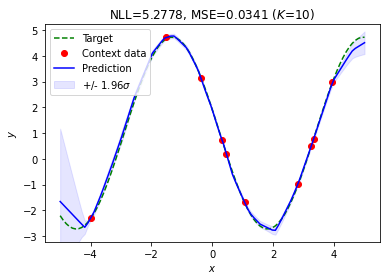

In [13]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["intermediate_mean"], 10, dataset_sines_infinite)